#Importowanie bibliotek

In [67]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [68]:
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/Football


In [69]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Football")

#Przygotowanie danych

In [71]:
results = pd.read_csv("results.csv")

In [72]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


<Axes: >

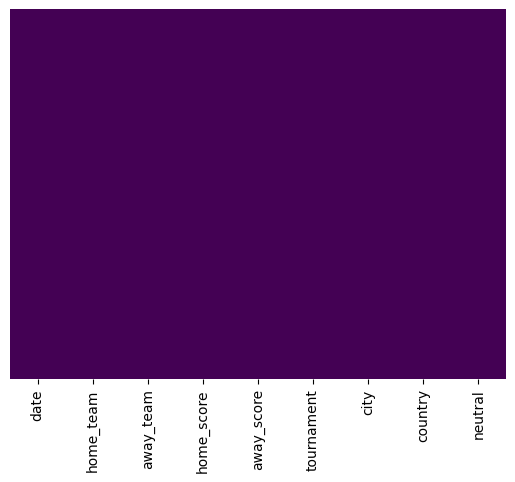

In [73]:
sns.heatmap(results.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [74]:
print(results['home_team'].unique())

['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Guernsey' 'Jersey'
 'Netherlands' 'Czechoslovakia' 'Alderney' 'Switzerland' 'Sweden'
 'Germany' 'Italy' 'Chile' 'Norway' 'Finland' 'Luxembourg' 'Russia'
 'Denmark' 'Catalonia' 'Basque Country' 'Brazil' 'Japan' 'Paraguay'
 'Canada' 'Estonia' 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland'
 'Yugoslavia' 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal'
 'Andalusia' 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain'
 'Mexico' 'Aruba' 'Egypt' 'Republic of Ireland' 'Haiti' 'Philippines'
 'Bulgaria' 'Jamaica' 'Kenya' 'Bolivia' 'Peru' 'Honduras' 'Guyana'
 'Uganda' 'Belarus' 'El Salvador' 'Barbados' 'Trinidad and Tobago'
 'Greece' 'Curaçao' 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname'
 'French Guiana' 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts and Nevis'
 'Panama' 'Slovakia' 'Manchukuo' 'Croatia' 'Nicaragua' 'Afghanistan'
 'India' 'Martinique'

In [75]:
print(results['away_team'].unique())

['England' 'Scotland' 'Wales' 'Northern Ireland' 'Canada' 'Argentina'
 'Hungary' 'Czechoslovakia' 'Austria' 'Uruguay' 'France' 'Switzerland'
 'Alderney' 'Guernsey' 'Netherlands' 'Belgium' 'Jersey' 'Germany' 'Norway'
 'Sweden' 'Italy' 'Chile' 'Catalonia' 'Finland' 'Russia' 'Luxembourg'
 'Denmark' 'Brazil' 'Basque Country' 'United States' 'Philippines'
 'Estonia' 'Provence' 'El Salvador' 'Costa Rica' 'Paraguay' 'Yugoslavia'
 'Poland' 'Portugal' 'Spain' 'Romania' 'Australia' 'Central Spain'
 'Mexico' 'Galicia' 'Brittany' 'Asturias' 'China PR' 'New Zealand'
 'Latvia' 'Guatemala' 'Curaçao' 'Bulgaria' 'Turkey' 'Lithuania' 'Egypt'
 'Republic of Ireland' 'South Africa' 'Jamaica' 'Japan' 'Uganda' 'Bolivia'
 'Haiti' 'Trinidad and Tobago' 'Kenya' 'Ukraine' 'Honduras' 'Nicaragua'
 'Greece' 'Guyana' 'Peru' 'Aruba' 'Martinique' 'Barbados' 'Cuba' 'Israel'
 'Indonesia' 'Suriname' 'Saint Lucia' 'Ecuador' 'Venezuela' 'Grenada'
 'India' 'Panama' 'Slovakia' 'Croatia' 'Lebanon' 'Manchukuo' 'Puerto Rico'
 '

In [76]:
# uniq_teams_home=results['home_team'].unique()
# uniq_teams_away=(results['away_team'].unique())
# uniq_teams_home.sort()
# uniq_teams_away.sort()
# uniq_teams = np.union1d(uniq_teams_home, uniq_teams_away)
# uniq_teams.sort()
# print(len(uniq_teams))

# Pobranie unikalnych wartości z kolumn home_team i away_team
uniq_teams_home = results['home_team'].unique()
uniq_teams_away = results['away_team'].unique()

# Konwersja wszystkich wartości na typ string
uniq_teams_home = [str(team) for team in uniq_teams_home]
uniq_teams_away = [str(team) for team in uniq_teams_away]

# Sortowanie
uniq_teams_home.sort()
uniq_teams_away.sort()

# Unia zestawów drużyn
uniq_teams = np.union1d(uniq_teams_home, uniq_teams_away)

print(uniq_teams)

['Abkhazia' 'Afghanistan' 'Albania' 'Alderney' 'Algeria' 'Ambazonia'
 'American Samoa' 'Andalusia' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Arameans Suryoye' 'Argentina' 'Armenia' 'Artsakh'
 'Aruba' 'Asturias' 'Australia' 'Austria' 'Aymara' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barawa' 'Barbados' 'Basque Country' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Biafra' 'Bolivia'
 'Bonaire' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brittany' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burma' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Canary Islands'
 'Cape Verde' 'Cascadia' 'Catalonia' 'Cayman Islands'
 'Central African Republic' 'Central Spain' 'Chad' 'Chagos Islands'
 'Chameria' 'Chechnya' 'Chile' 'China' 'China PR' 'Cilento' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Corsica' 'Costa Rica' 'County of Nice'
 'Crimea' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic'
 'Czechoslovakia' 'DR Congo' 'Darfur' 'Denmark' 'Djibouti' 'D

In [77]:
def determine_winner(results):
    if results['home_score'] > results['away_score']:
        return True
    elif results['home_score'] == results['away_score']:
        return False
    else:
        return False
results['home_winner'] = results.apply(determine_winner, axis=1)


In [78]:
#results.drop(columns=["date"], inplace=True) #Dupa
results.drop(columns=["away_score"], inplace=True)
#results.drop(columns=["home_score"], inplace=True)
#results.drop(columns=["city"], inplace=True) #Zmiana na wartosci liczbowe
results.drop(columns=["country"], inplace=True)#Zmiana na wartosci liczbowe
results.drop(columns=["tournament"], inplace=True)
#results.drop(columns=["neutral"], inplace=True)


In [79]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46442 entries, 0 to 46441
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         46442 non-null  object
 1   home_team    46442 non-null  object
 2   away_team    46442 non-null  object
 3   home_score   46442 non-null  int64 
 4   city         46442 non-null  object
 5   neutral      46442 non-null  bool  
 6   home_winner  46442 non-null  bool  
dtypes: bool(2), int64(1), object(4)
memory usage: 1.9+ MB


In [80]:
lab_enc = LabelEncoder()
results["home_team"] = lab_enc.fit_transform(results["home_team"])
results["away_team"] = lab_enc.fit_transform(results["away_team"])
#results["tournament"] = lab_enc.fit_transform(results["tournament"])
results["city"] = lab_enc.fit_transform(results["city"])
#results["country"] = lab_enc.fit_transform(results["country"])
results["neutral"] = lab_enc.fit_transform(results["neutral"])
results["date"] = lab_enc.fit_transform(results["date"])
results["home_winner"] = lab_enc.fit_transform(results["home_winner"])

In [81]:
#Podmiana string home_team i away_team na wartosci unikalne z tabeli uniq_teams
#team_to_id = {team: idx for idx, team in enumerate(uniq_teams, start=1)}
#results['home_team'] = results['home_team'].map(team_to_id)
#results['away_team'] = results['away_team'].map(team_to_id)

In [82]:
results.tail()

,date,home_team,away_team,home_score,city,neutral,home_winner
46437,15959,249,202,0,652,0,0
46438,15959,252,31,1,71,1,1
46439,15959,261,219,2,1018,0,1
46440,15959,269,39,3,1067,0,0
46441,15959,98,92,2,733,0,1


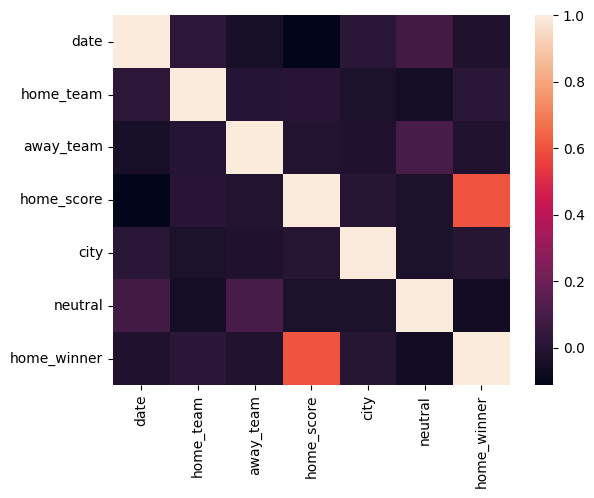

In [83]:
sns.heatmap(results.corr());

In [84]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46442 entries, 0 to 46441
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   date         46442 non-null  int64
 1   home_team    46442 non-null  int64
 2   away_team    46442 non-null  int64
 3   home_score   46442 non-null  int64
 4   city         46442 non-null  int64
 5   neutral      46442 non-null  int64
 6   home_winner  46442 non-null  int64
dtypes: int64(7)
memory usage: 2.5 MB


<Axes: xlabel='home_winner', ylabel='count'>

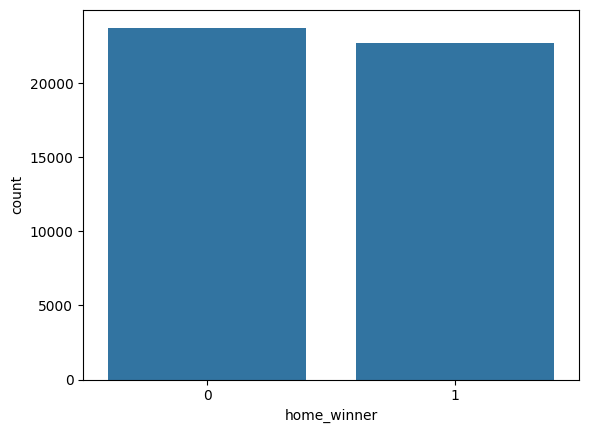

In [85]:
#Porównywanie wyników dla meczów domowych 2 oznacza zwyciestwo druzyny która grała u siebie
#1 oznacza remis, a 0 oznacza, że drużyna przyjezdnych wygrywała
sns.countplot(x="home_winner", data=results)

In [86]:
#results['home_winner'].value_counts()
#yes_sample_size = results['home_winner'].value_counts()[1]
#print(yes_sample_size)
#temp_0 = results[results['home_winner'] == 0].sample(n=yes_sample_size)
#temp_2 = results[results['home_winner'] == 1].sample(n=yes_sample_size)

#sns.countplot(x="home_winner", data=pd.concat([temp_2]))
#results = results[results['home_winner'] != 1]
#results = results[results['home_winner'] != 2]
#results = pd.concat([results, temp_0])
#sns.countplot(x="home_winner", data=results)

#Trenowanie


In [87]:
X = results.drop(["home_winner"], axis=1)
y = results["home_winner"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.10,
                                                    random_state=101)

In [89]:
def model(X_train, y_train):
  forest = RandomForestClassifier(n_estimators=10, random_state=101)
  forest.fit(X_train, y_train)
  print(f"Las: {forest.score(X_train, y_train)}")

  lreg = LogisticRegression(max_iter=5000)
  lreg.fit(X_train, y_train)
  print(f"Regresja logistyczna: {lreg.score(X_train, y_train)}")

  tree = DecisionTreeClassifier()
  tree.fit(X_train, y_train)
  print(f"Drzewa decyzyjne: {tree.score(X_train, y_train)}")

  xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
  xgb.fit(X_train, y_train)
  print(f"XGBoost: {xgb.score(X_train, y_train)}")

  return forest, lreg, tree, xgb

forest, lreg, tree, xgb = model(X_train, y_train)

Las: 0.9877742421704907
Regresja logistyczna: 0.8190061487666579
Drzewa decyzyjne: 1.0
XGBoost: 0.8664258200349307


In [90]:
y1_predict = forest.predict(X_test)
print(f"Random Forest {accuracy_score(y_test, y1_predict)}")

y2_predict = lreg.predict(X_test)
print(f"Logistic Regresion {accuracy_score(y_test, y2_predict)}")

y3_predict = tree.predict(X_test)
print(f"Desision Tree {accuracy_score(y_test, y3_predict)}")

y4_predict = xgb.predict(X_test)
print(f"Xgb {accuracy_score(y_test, y4_predict)}")


Random Forest 0.7959095801937567
Logistic Regresion 0.8152852529601722
Desision Tree 0.7728740581270183
Xgb 0.8144241119483315


In [91]:
print("Ocena modelu 1. Las")
print(classification_report(y_test, y1_predict))

Ocena modelu 1. Las
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2334
           1       0.81      0.77      0.79      2311

    accuracy                           0.80      4645
   macro avg       0.80      0.80      0.80      4645
weighted avg       0.80      0.80      0.80      4645



In [92]:

print("Ocena modelu 2. Regresja logistyczna")
print(classification_report(y_test, y2_predict))

Ocena modelu 2. Regresja logistyczna
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2334
           1       0.83      0.79      0.81      2311

    accuracy                           0.82      4645
   macro avg       0.82      0.82      0.82      4645
weighted avg       0.82      0.82      0.82      4645



In [93]:

print("Ocena modelu 3. Drzewa decyzyjne")
print(classification_report(y_test, y3_predict))

Ocena modelu 3. Drzewa decyzyjne
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2334
           1       0.77      0.77      0.77      2311

    accuracy                           0.77      4645
   macro avg       0.77      0.77      0.77      4645
weighted avg       0.77      0.77      0.77      4645



In [94]:

print("Ocena modelu 4. Xgb")
print(classification_report(y_test, y4_predict))

Ocena modelu 4. Xgb
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      2334
           1       0.82      0.81      0.81      2311

    accuracy                           0.81      4645
   macro avg       0.81      0.81      0.81      4645
weighted avg       0.81      0.81      0.81      4645



#Eksport modelu

In [95]:
filename = "win_pred.pkl"
pickle.dump(lreg, open(filename, "wb"))